In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from utils.base_directory import base_directory

In [16]:
IS_DATASET_ON_POLITICAL_LEANING = True
DATASET_NAME = "article_bias_prediction"

label_column_name = "leaning" if IS_DATASET_ON_POLITICAL_LEANING else "politicalness"
df = pd.read_parquet(
    base_directory /
    "datasets" /
    ("political_leaning" if IS_DATASET_ON_POLITICAL_LEANING else "politicalness") /
    "preprocessed" /
    f"{DATASET_NAME}.parquet"
)
df

,title,body,leaning,politicalness,title_length,title_word_count,body_length,body_word_count
56,Presidential Double Take: The Difference Four ...,Presidential Double Take : The Difference Four...,center,political,57,8,309,63
1378,"Analysis: Republicans Get Wonky, Actually Deba...","Rubio does repeat himself , but people don ’ t...",right,political,75,11,375,79
27806,In photos: Easter and Passover celebrated arou...,Families and communities around the globe are ...,center,political,74,11,404,68
20584,The Disappearing Political Center: In More Pla...,For a stark illustration of how the political ...,center,political,73,10,407,76
33215,Housing Secretary to Stay On,Shaun Donovan will stay in his job as head of ...,center,political,28,5,711,129
...,...,...,...,...,...,...,...,...
503,The Second Term,"In November , 1984 , President Ronald Reagan w...",left,political,15,3,50644,9597
14183,Michael Cohen Testifies,President Trump Donald John TrumpGOP senators ...,center,political,23,3,51367,9661
6248,"What states are opening up, and when? States a...",Some experts believe the United States has pas...,center,political,103,17,52449,9330
21458,The Billion-Dollar Disinformation Campaign to ...,"Updated at 2:30 p.m . ET on February 10 , 2020...",left,political,67,8,53289,9695


General statistical information.

In [17]:
df.describe()

,title_length,title_word_count,body_length,body_word_count
count,37550.000000,37550.000000,37550.000000,37550.000000
mean,62.501811,9.848415,5848.397443,1084.338961
std,20.255034,3.261705,4001.320800,750.705213
min,5.000000,1.000000,309.000000,63.000000
25%,49.000000,8.000000,3355.000000,619.000000
50%,61.000000,10.000000,4950.000000,916.000000
75%,75.000000,12.000000,7020.000000,1301.000000
max,255.000000,37.000000,53992.000000,9703.000000


Distribution of the title word count.

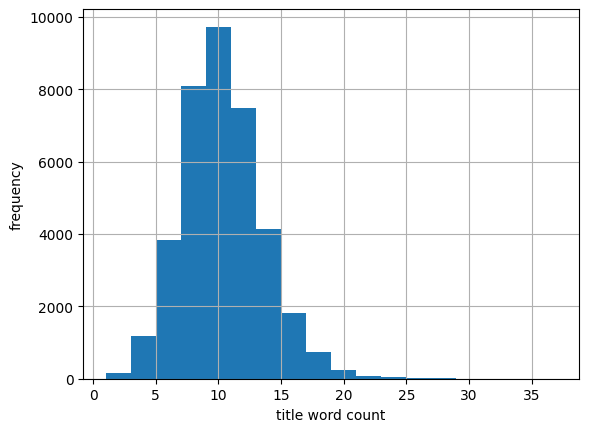

In [18]:
if "title" in df.columns:
    df["title_word_count"].hist(bins=int(np.log(df["title_word_count"].max()) * 5))
    plt.xlabel("title word count")
    plt.ylabel("frequency")

Distribution of the body word count.

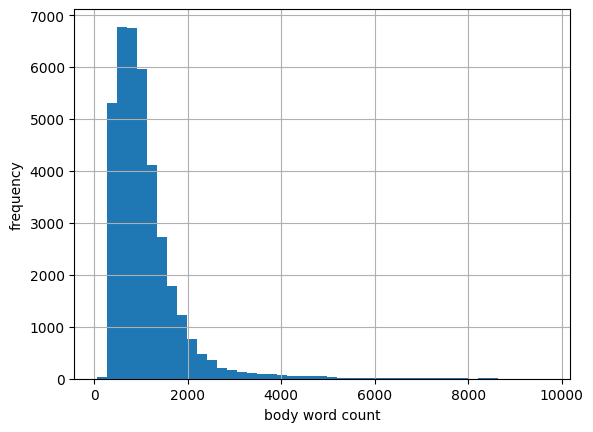

In [19]:
df["body_word_count"].hist(bins=int(np.log(df["body_word_count"].max()) * 5))
plt.xlabel("body word count")
plt.ylabel("frequency");

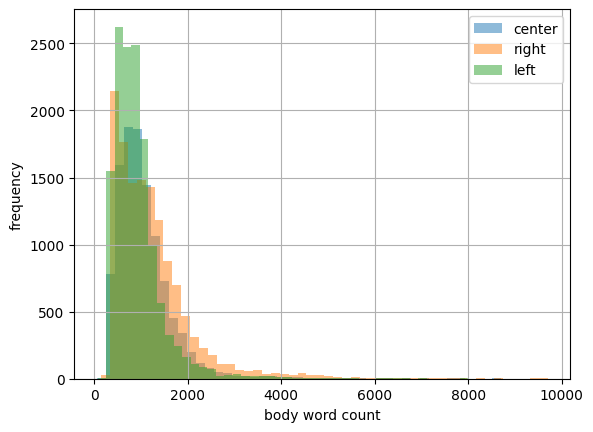

In [20]:
df.groupby(label_column_name, observed=True)["body_word_count"].hist(bins=50, alpha=0.5)
plt.xlabel("body word count")
plt.legend(df[label_column_name].unique())
plt.ylabel("frequency");

The label class distribution.

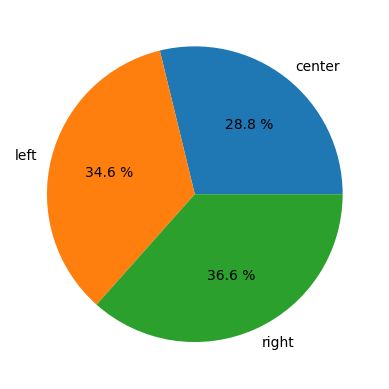

In [21]:
df.groupby(
    label_column_name,
    observed=True
).size().plot.pie(autopct="%1.1f %%");